# Oleh: Ridho Nur Rohman Wijaya

# Import Modul

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ambil Data

In [3]:
df_train = pd.read_csv('train (1).csv')
df_test = pd.read_csv('test (1).csv')

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**Keterangan:** <br>
Pada permasalahan ini, data test tidak digunakan, karena kebenarannya belum diketahui

## Preprocessing Data Train

### Cek data kosong

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


**Kesimpulan:**
1. Isi kolom 'Age' dengan rata-rata atau median.
2. Isi kolom 'Embarked' dengan data terbanyak atau data terkecil.
3. Buang kolom 'Cabin', sebab terlalu banyak data kosong.
4. Buang kolom 'PassengerId', 'Name', dan 'Tiket' karena tidak dibutuhkan.

In [7]:
df_train_new = df_train.drop(columns=["PassengerId","Name","Ticket","Cabin"])
df_train_new.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Cek frekuensi data

In [8]:
df_train_new.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df_train_new.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

### Isi data kosong

Terdapat 4 kombinasi pengisian data yaitu:
1. Age rata-rata dan Embarked terbanyak
2. Age rata-rata dan Embarked terkecil
3. Age median dan Embarked terbanyak
4. Age median dan Embarked terkecil

In [10]:
df_train_new_kombinasi1 = df_train_new.fillna(value={"Age" : df_train_new.Age.mean(), "Embarked" : "S"})
df_train_new_kombinasi2 = df_train_new.fillna(value={"Age" : df_train_new.Age.mean(), "Embarked" : "Q"})
df_train_new_kombinasi3 = df_train_new.fillna(value={"Age" : df_train_new.Age.median(), "Embarked" : "S"})
df_train_new_kombinasi4 = df_train_new.fillna(value={"Age" : df_train_new.Age.median(), "Embarked" : "Q"})

In [11]:
# Cek data
df_train_new_kombinasi1.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S


#### Encode data non numerik

In [12]:
df_train_new_kombinasi1 = pd.get_dummies(df_train_new_kombinasi1)
df_train_new_kombinasi2 = pd.get_dummies(df_train_new_kombinasi2)
df_train_new_kombinasi3 = pd.get_dummies(df_train_new_kombinasi3)
df_train_new_kombinasi4 = pd.get_dummies(df_train_new_kombinasi4)

In [13]:
# Cek data
df_train_new_kombinasi1.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1


# Buat Model Decission Tree Sederhana

### Persiapan Data

In [14]:
features_kombinasi1 = df_train_new_kombinasi1.iloc[:,1:].values
target_kombinasi1 = df_train_new_kombinasi1.iloc[:,0].values

features_kombinasi2 = df_train_new_kombinasi1.iloc[:,1:].values
target_kombinasi2 = df_train_new_kombinasi1.iloc[:,0].values

features_kombinasi3 = df_train_new_kombinasi1.iloc[:,1:].values
target_kombinasi3 = df_train_new_kombinasi1.iloc[:,0].values

features_kombinasi4 = df_train_new_kombinasi1.iloc[:,1:].values
target_kombinasi4 = df_train_new_kombinasi1.iloc[:,0].values

#### Bagi data latih dan validasi

In [15]:
x_train1, x_valid1, y_train1, y_valid1 = train_test_split(features_kombinasi1, target_kombinasi1, test_size=0.2, random_state=42)
x_train2, x_valid2, y_train2, y_valid2 = train_test_split(features_kombinasi2, target_kombinasi2, test_size=0.2, random_state=42)
x_train3, x_valid3, y_train3, y_valid3 = train_test_split(features_kombinasi3, target_kombinasi3, test_size=0.2, random_state=42)
x_train4, x_valid4, y_train4, y_valid4 = train_test_split(features_kombinasi4, target_kombinasi4, test_size=0.2, random_state=42)

### Buat Model

In [16]:
model1 = DecisionTreeClassifier(random_state=42)
model1.fit(x_train1, y_train1)

model2 = DecisionTreeClassifier(random_state=42)
model2.fit(x_train2, y_train2)

model3 = DecisionTreeClassifier(random_state=42)
model3.fit(x_train3, y_train3)

model4 = DecisionTreeClassifier(random_state=42)
model4.fit(x_train4, y_train4)

DecisionTreeClassifier(random_state=42)

### Prediksi

In [17]:
y_pred1 = model1.predict(x_valid1)
y_pred2 = model2.predict(x_valid2)
y_pred3 = model3.predict(x_valid3)
y_pred4 = model4.predict(x_valid4)

acc1 = accuracy_score(y_valid1, y_pred1)
acc2 = accuracy_score(y_valid2, y_pred2)
acc3 = accuracy_score(y_valid3, y_pred3)
acc4 = accuracy_score(y_valid4, y_pred4)

acc_valid = [acc1, acc2, acc3, acc4]

### Cek hasil prediksi dan visualisasi

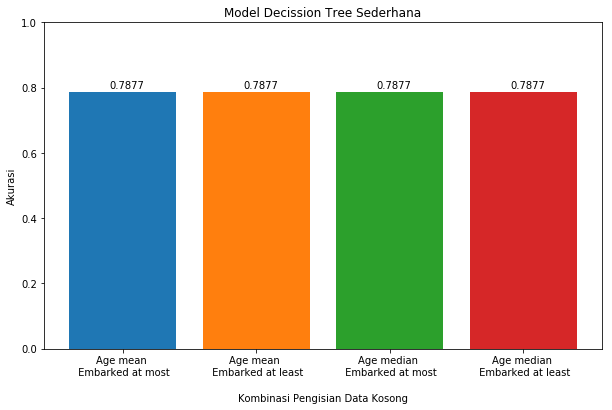

In [18]:
plt.figure(figsize=(10,6))
xlabels = ["Age mean \n Embarked at most", "Age mean \n Embarked at least", 
           "Age median \n Embarked at most", "Age median \n Embarked at least"]
for i in range(len(xlabels)):
    plt.bar(xlabels[i], acc_valid[i])
    plt.text(i-0.1, acc_valid[i]+0.01, round(acc_valid[i], 4))

plt.ylim([0,1])
plt.title("Model Decission Tree Sederhana")
plt.ylabel("Akurasi")
plt.xlabel("\nKombinasi Pengisian Data Kosong")
plt.show()

**Kesimpulan:** <br>
Dari 4 kombinasi pengisian data kosong yang ada, hasil akurasi tetap sama, jadi perbedaan pengisian tidak terlalu berpengaruh. Hasil prediksinya yaitu 78,77%

# Buat Model Decission Tree Sederhana dengan Data Normalisasi

### Persiapan Data

#### Normalisasi

In [19]:
scaler1 = MinMaxScaler()
data_kombinasi1_scaler = scaler1.fit_transform(df_train_new_kombinasi1)

scaler2 = MinMaxScaler()
data_kombinasi2_scaler = scaler2.fit_transform(df_train_new_kombinasi2)

scaler3 = MinMaxScaler()
data_kombinasi3_scaler = scaler3.fit_transform(df_train_new_kombinasi3)

scaler4 = MinMaxScaler()
data_kombinasi4_scaler = scaler4.fit_transform(df_train_new_kombinasi4)

In [20]:
features_kombinasi1_sc = data_kombinasi1_scaler[:,1:]
target_kombinasi1_sc = data_kombinasi1_scaler[:,0]

features_kombinasi2_sc = data_kombinasi2_scaler[:,1:]
target_kombinasi2_sc = data_kombinasi2_scaler[:,0]

features_kombinasi3_sc = data_kombinasi3_scaler[:,1:]
target_kombinasi3_sc = data_kombinasi3_scaler[:,0]

features_kombinasi4_sc = data_kombinasi4_scaler[:,1:]
target_kombinasi4_sc = data_kombinasi4_scaler[:,0]

#### Bagi data latih dan validasi

In [21]:
x_train1_sc, x_valid1_sc, y_train1_sc, y_valid1_sc = train_test_split(features_kombinasi1_sc, target_kombinasi1_sc, test_size=0.2, random_state=42)
x_train2_sc, x_valid2_sc, y_train2_sc, y_valid2_sc = train_test_split(features_kombinasi2_sc, target_kombinasi2_sc, test_size=0.2, random_state=42)
x_train3_sc, x_valid3_sc, y_train3_sc, y_valid3_sc = train_test_split(features_kombinasi3_sc, target_kombinasi3_sc, test_size=0.2, random_state=42)
x_train4_sc, x_valid4_sc, y_train4_sc, y_valid4_sc = train_test_split(features_kombinasi4_sc, target_kombinasi4_sc, test_size=0.2, random_state=42)

### Buat Model

In [22]:
model1_sc = DecisionTreeClassifier(random_state=42)
model1_sc.fit(x_train1_sc, y_train1_sc)

model2_sc = DecisionTreeClassifier(random_state=42)
model2_sc.fit(x_train2_sc, y_train2_sc)

model3_sc = DecisionTreeClassifier(random_state=42)
model3_sc.fit(x_train3_sc, y_train3_sc)

model4_sc = DecisionTreeClassifier(random_state=42)
model4_sc.fit(x_train4_sc, y_train4_sc)

DecisionTreeClassifier(random_state=42)

### Prediksi

In [23]:
y_pred1_sc = model1_sc.predict(x_valid1_sc)
y_pred2_sc = model2_sc.predict(x_valid2_sc)
y_pred3_sc = model3_sc.predict(x_valid3_sc)
y_pred4_sc = model4_sc.predict(x_valid4_sc)

acc1_sc = accuracy_score(y_valid1_sc, y_pred1_sc)
acc2_sc = accuracy_score(y_valid2_sc, y_pred2_sc)
acc3_sc = accuracy_score(y_valid3_sc, y_pred3_sc)
acc4_sc = accuracy_score(y_valid4_sc, y_pred4_sc)

acc_valid_sc = [acc1_sc, acc2_sc, acc3_sc, acc4_sc]

### Cek hasil prediksi dan visualisasi

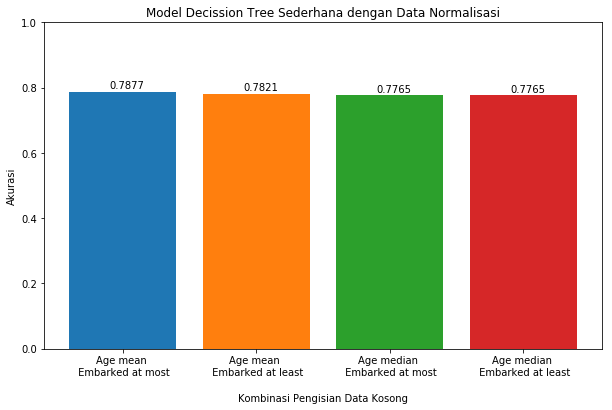

In [24]:
plt.figure(figsize=(10,6))
xlabels = ["Age mean \n Embarked at most", "Age mean \n Embarked at least", 
           "Age median \n Embarked at most", "Age median \n Embarked at least"]
for i in range(len(xlabels)):
    plt.bar(xlabels[i], acc_valid_sc[i])
    plt.text(i-0.1, acc_valid_sc[i]+0.01, round(acc_valid_sc[i], 4))

plt.ylim([0,1])
plt.title("Model Decission Tree Sederhana dengan Data Normalisasi")
plt.ylabel("Akurasi")
plt.xlabel("\nKombinasi Pengisian Data Kosong")
plt.show()

**Kesimpulan:** <br>
Dari 4 kombinasi pengisian data kosong yang ada dengan data normalisasi, prediksi paling bagus adalah saat pengisian kolom Age dengan rata-rata dan Embarked dengan yang paling banyak. Hasil prediksinya yaitu 78,77%

# Optimasi Model Decission Tree dengan Data Normalisasi
Data yang dipakai adalah pengisian 'Age" rata-rata dan 'Embarked' Terbanyak hasil normalisasi

### Persiapan Data

In [25]:
x_train_fix = x_train1_sc.copy()
x_valid_fix = x_valid1_sc.copy()
y_train_fix = y_train1_sc.copy()
y_valid_fix = y_valid1_sc.copy()

### Buat Model
Optimasi model meninjau 'max_depth' dan 'min_samples_split'

#### Optimasi Max Depth

In [26]:
model_depth1 = DecisionTreeClassifier(max_depth=3, random_state=42)
model_depth1.fit(x_train_fix, y_train_fix)

model_depth2 = DecisionTreeClassifier(max_depth=5, random_state=42)
model_depth2.fit(x_train_fix, y_train_fix)

model_depth3 = DecisionTreeClassifier(max_depth=7, random_state=42)
model_depth3.fit(x_train_fix, y_train_fix)

model_depth4 = DecisionTreeClassifier(max_depth=9, random_state=42)
model_depth4.fit(x_train_fix, y_train_fix)

model_depth5 = DecisionTreeClassifier(max_depth=11, random_state=42)
model_depth5.fit(x_train_fix, y_train_fix)

DecisionTreeClassifier(max_depth=11, random_state=42)

#### Optimasi Min Samples Split

In [27]:
model_minsplit1 = DecisionTreeClassifier(min_samples_split=3, random_state=42)
model_minsplit1.fit(x_train_fix, y_train_fix)

model_minsplit2 = DecisionTreeClassifier(min_samples_split=7, random_state=42)
model_minsplit2.fit(x_train_fix, y_train_fix)

model_minsplit3 = DecisionTreeClassifier(min_samples_split=9, random_state=42)
model_minsplit3.fit(x_train_fix, y_train_fix)

model_minsplit4 = DecisionTreeClassifier(min_samples_split=13, random_state=42)
model_minsplit4.fit(x_train_fix, y_train_fix)

model_minsplit5 = DecisionTreeClassifier(min_samples_split=17, random_state=42)
model_minsplit5.fit(x_train_fix, y_train_fix)

DecisionTreeClassifier(min_samples_split=17, random_state=42)

#### Optimasi Max Depth dan Min Samples Split

In [28]:
model_dept_split1 = DecisionTreeClassifier(max_depth=5, min_samples_split=13, random_state=42)
model_dept_split1.fit(x_train_fix, y_train_fix)

model_dept_split2 = DecisionTreeClassifier(max_depth=5, min_samples_split=17, random_state=42)
model_dept_split2.fit(x_train_fix, y_train_fix)

model_dept_split3 = DecisionTreeClassifier(max_depth=7, min_samples_split=13, random_state=42)
model_dept_split3.fit(x_train_fix, y_train_fix)

model_dept_split4 = DecisionTreeClassifier(max_depth=7, min_samples_split=17, random_state=42)
model_dept_split4.fit(x_train_fix, y_train_fix)

DecisionTreeClassifier(max_depth=7, min_samples_split=17, random_state=42)

### Prediksi

#### Prediksi Optimasi Max Depth

In [29]:
y_pred_depth1 = model_depth1.predict(x_valid_fix)
y_pred_depth2 = model_depth2.predict(x_valid_fix)
y_pred_depth3 = model_depth3.predict(x_valid_fix)
y_pred_depth4 = model_depth4.predict(x_valid_fix)
y_pred_depth5 = model_depth5.predict(x_valid_fix)

acc_depth1 = accuracy_score(y_valid_fix, y_pred_depth1)
acc_depth2 = accuracy_score(y_valid_fix, y_pred_depth2)
acc_depth3 = accuracy_score(y_valid_fix, y_pred_depth3)
acc_depth4 = accuracy_score(y_valid_fix, y_pred_depth4)
acc_depth5 = accuracy_score(y_valid_fix, y_pred_depth5)

acc_valid_depth = [acc_depth1, acc_depth2, acc_depth3, acc_depth4, acc_depth5]

#### Prediksi Optimasi Min Samples Split

In [30]:
y_pred_minsplit1 = model_minsplit1.predict(x_valid_fix)
y_pred_minsplit2 = model_minsplit2.predict(x_valid_fix)
y_pred_minsplit3 = model_minsplit3.predict(x_valid_fix)
y_pred_minsplit4 = model_minsplit4.predict(x_valid_fix)
y_pred_minsplit5 = model_minsplit5.predict(x_valid_fix)

acc_minsplit1 = accuracy_score(y_valid_fix, y_pred_minsplit1)
acc_minsplit2 = accuracy_score(y_valid_fix, y_pred_minsplit2)
acc_minsplit3 = accuracy_score(y_valid_fix, y_pred_minsplit3)
acc_minsplit4 = accuracy_score(y_valid_fix, y_pred_minsplit4)
acc_minsplit5 = accuracy_score(y_valid_fix, y_pred_minsplit5)

acc_valid_minsplit = [acc_minsplit1, acc_minsplit2, acc_minsplit3, acc_minsplit4, acc_minsplit5]

#### Optimasi Max Depth dan Min Samples Split

In [31]:
y_pred_dept_split1 = model_dept_split1.predict(x_valid_fix)
y_pred_dept_split2 = model_dept_split2.predict(x_valid_fix)
y_pred_dept_split3 = model_dept_split3.predict(x_valid_fix)
y_pred_dept_split4 = model_dept_split4.predict(x_valid_fix)

acc_dept_split1 = accuracy_score(y_valid_fix, y_pred_dept_split1)
acc_dept_split2 = accuracy_score(y_valid_fix, y_pred_dept_split2)
acc_dept_split3 = accuracy_score(y_valid_fix, y_pred_dept_split3)
acc_dept_split4 = accuracy_score(y_valid_fix, y_pred_dept_split4)

acc_valid_dept_split = [acc_dept_split1, acc_dept_split2, acc_dept_split3, acc_dept_split4]

### Cek hasil prediksi dan visualisasi

#### Visualisasi Prediksi Optimasi Max Depth

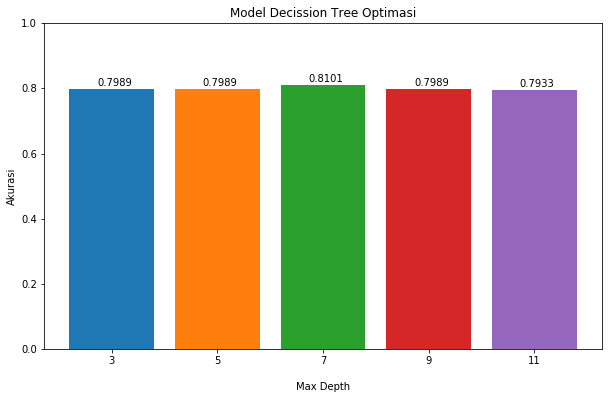

In [32]:
plt.figure(figsize=(10,6))
xlabels = ["3", "5", "7", "9", "11"]
for i in range(len(xlabels)):
    plt.bar(xlabels[i], acc_valid_depth[i])
    plt.text(i-0.14, acc_valid_depth[i]+0.01, round(acc_valid_depth[i], 4))

plt.ylim([0,1])
plt.title("Model Decission Tree Optimasi")
plt.ylabel("Akurasi")
plt.xlabel("\nMax Depth")
plt.show()

**Kesimpulan:** <br>
Prediksi paling bagus saat Max Depth nya 7 yaitu 81,01%

#### Visualisasi Prediksi Optimasi Min Samples Split

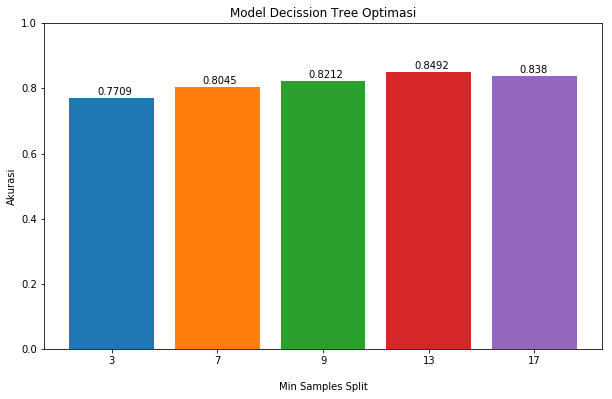

In [33]:
plt.figure(figsize=(10,6))
xlabels = ["3", "7", "9", "13", "17"]
for i in range(len(xlabels)):
    plt.bar(xlabels[i], acc_valid_minsplit[i])
    plt.text(i-0.14, acc_valid_minsplit[i]+0.01, round(acc_valid_minsplit[i], 4))

plt.ylim([0,1])
plt.title("Model Decission Tree Optimasi")
plt.ylabel("Akurasi")
plt.xlabel("\nMin Samples Split")
plt.show()

**Kesimpulan:** <br>
Prediksi paling bagus saat min samples splitnya 13 yaitu 84,92%

#### Visualisasi Prediksi Optimasi Max Depth dan Min Samples Split

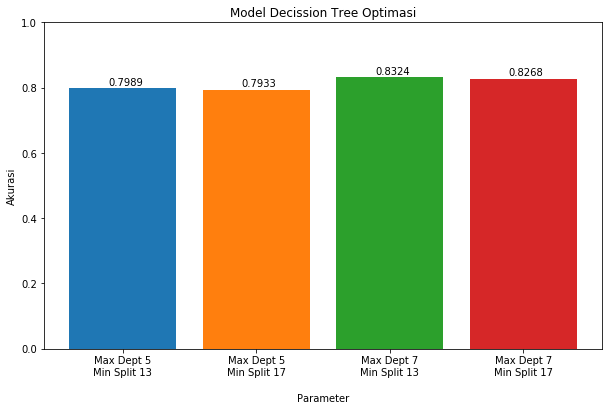

In [34]:
plt.figure(figsize=(10,6))
xlabels = ["Max Dept 5\nMin Split 13", "Max Dept 5\nMin Split 17", 
           "Max Dept 7\nMin Split 13", "Max Dept 7\nMin Split 17"]
for i in range(len(xlabels)):
    plt.bar(xlabels[i], acc_valid_dept_split[i])
    plt.text(i-0.11, acc_valid_dept_split[i]+0.01, round(acc_valid_dept_split[i], 4))

plt.ylim([0,1])
plt.title("Model Decission Tree Optimasi")
plt.ylabel("Akurasi")
plt.xlabel("\nParameter")
plt.show()

**Kesimpulan:** <br>
Prediksi untuk optimasi model Decission Tree Max Dept 7 dan Min Samples Split 13 cukup bagus yaitu 83,24%